<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Estat%C3%ADstica%20Pr%C3%A1tica/1.%20An%C3%A1lise%20Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos acerca de estatística aplicada à Ciência de Dados. Meu objetivo aqui é implementar o que já conheço de estatística por meio do livro ***Estatística prática para cientistas de dados: 50 conceitos essenciais***, e me aprofundar no meio, tornando-me mais capaz, eficiente e eficaz nos meu projetos tanto profissionais quanto pessoais.
    
Um ponto a ser levado em consideração é que o Livro trata dos conceitos estatísticos aplicados à ***linguagem R***, sendo necessário realizar a "tradução" da linguagem e aplicação dos raciocínios envolvidos à linguagem Python, fazendo com que cada exemplo e exercício associado um pouco mais aprofundado por passar primariamente por esse processo. Além da tradução, também torna-se necessário realizar a pesquisa referente à documentação associada à função desejada, nesse projeto utilizarei as visualizações da biblioteca **seaborn** com alguns ajustes realizados com o auxílio da biblioteca **matplotlib**.

</p>

In [2]:
# Importação das bibliotecas para manipulação e tratamento de dados
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean

## Métricas Robustas para Localização

Métricas que fornecem uma visão geral do conjunto de dados, possibilitam visualizar medidas de tendência central dos dados para posterior inferência dos dados com o auxílio das métricas para variabilidade.

In [3]:
# Criação de dataset através de dicionário
homicidio = {'Estado': {0: 'Alabama',
                        1: 'Alasca',
                        2: 'Arizona',
                        3: 'Arkansas',
                        4: 'Califórnia',
                        5: 'Colorado',
                        6: 'Connecticut',
                        7: 'Delaware'

},
    'População': {
        0: 4779736,
        1: 710231,
        2: 6392017,
        3: 2915918,
        4: 37252956,
        5: 5029196,
        6: 3574097,
        7: 897934

    },
             'Taxa de Homicídio': {0: 5.7,
                                  1: 5.6,
                                  2: 4.7,
                                  3: 5.6,
                                  4: 4.4,
                                  5: 2.8,
                                   6: 2.4,
                                   7: 5.8
                                  }
}

In [4]:
# Importação dos dados para um Data Frame
dados = pd.DataFrame(homicidio)
dados

,Estado,População,Taxa de Homicídio
0,Alabama,4779736,5.7
1,Alasca,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,Califórnia,37252956,4.4
5,Colorado,5029196,2.8
6,Connecticut,3574097,2.4
7,Delaware,897934,5.8


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado             8 non-null      object 
 1   População          8 non-null      int64  
 2   Taxa de Homicídio  8 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
# média
dados['População'].mean()

7694010.625

In [7]:
# média aparada
trim_mean(dados.População, 0.25)

4074736.75

In [8]:
# mediana
dados['População'].median()

4176916.5

## Estimativas de Variabilidade

São métricas que estabelecem intervalos de confiabilidade dos dados, baseando-se no próprio conjunto. São medidas que estabelecem um certo "limite" para que as incertezas não prejudiquem a análise como um todo, contudo, elas permitem ainda identificar Outliers - pontos fora desse intervalo -, os quais dependendo das análises são os fatores de interesse de nossa análise.

Todos os casos envolvendo Outliers devem ser estudados, pois nem sempre a exclusão destes pontos será a solução adequada para uma análise satisfatória, cabe ao analista enxergar a importância ou não a influência deste Outlier.

**Variância**

$S^2=\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}$



**Desvio Padrão**

$σ=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$


**Desvio Absoluto Médio**

$D_m = \frac{\sum_{i=1}^{n}|(x_i-\overline{x})|}{n} $

**Desvio absoluto mediano da mediana**

A mediana do valor absoluto dos desvios da mediana. (Utilizado quando temos Outliers no problema)

**Amplitude**

A diferença entre o maior e o menor valor no conjunto de dados


---

## Estatísticas ordinais

Métricas baseadas nos valores de dados classificados do menor ao maior.

**Percentil**

Valor tal que P por cento dos valores assumam esse valor ou menos, e (100-P) por cento assumam esse valor ou mais.

**Amplitude interquartílica (IQR)**

A diferença entre o 75º percentil e o 25º percentil.

In [9]:
# Desvio padrão
dados['População'].std()

12105396.467286125

In [10]:
# IQR
dados['População'].quantile()

4176916.5

In [11]:
# Desvio absoluto mediano da mediana (MAD)
stats.median_abs_deviation(dados['População'])

1738049.5

---

## Explorando a Distribuição de Dados

Cada uma das estimativas vistas anteriormente acaba resumindo os dados em um único número para descrever a localização ou variabilidade dos dados. É útil também explorar como os dados são distribuídos em geral.

**Boxplot**

Um gráfico apresentado por Tukey como um modo rápido de visualizar a distribuição dos dados.

**Tabela de frequências**

Um registro da contagem de valores numéricos de dados que caem em um conjunto de intervalos (colunas).

**Histograma**

Um gráfico da tabela de frequências com as colunas no eixo x e a contagem (ou proporção) no eixo y.

**Gráfico de densidade**

Uma versão simplificada do histograma, frequentemente usado em estimativas de densidade Kernel.

### Percentis e Boxplots

Os percentis são úteis para resumir a distribuição dos dados. É comum registrar os quartis (25º, 50º e 75º) e os decis (10º, 20º, ..., 90º). Os percentis são comumente utlizados para resumir *caudas* (a amplitude externa) da distribuição. Valores que ultrapassem 1,5 vezes o IQR são considerados Outliers e representados além dos *Whiskers*.

<Axes: ylabel='População'>

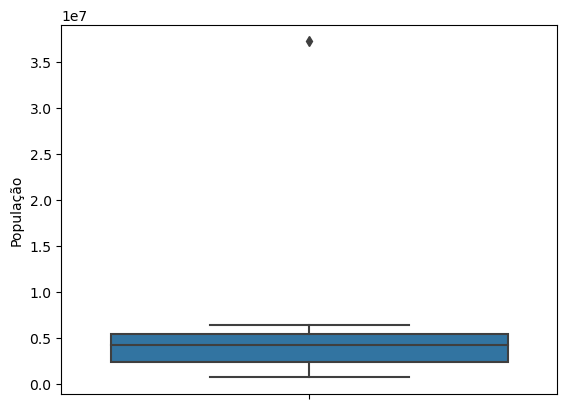

In [12]:
sns.boxplot(data = dados, y = 'População')

Os boxplots são excelentes ferramentas para visualizações rápidas da distribuição dos dados. No exemplo acima vemos uma distribuição concentrada próxima de 5 milhões de habitantes destacadas na região azul, e um único ponto como Outlier acima de 35 milhões de habitantes. A mediana é o traçado próximo ao centro do box, com valor inferior a 5 milhões de habitantes. A região azul é e a denominada de IQR, a amplitude entre os intervalos de 25º e 75º quartis dos dados.

### Tabela de Frequências e Histogramas

Uma tabela de frequências de uma variável divide a amplitude variável em segmentos igualmente espaçados e nos diz quantos valores caem em cada segmento.

[Text(0.5, 1.0, 'Histograma da População'),
 Text(0.5, 0, 'População'),
 Text(0, 0.5, 'Frequência')]

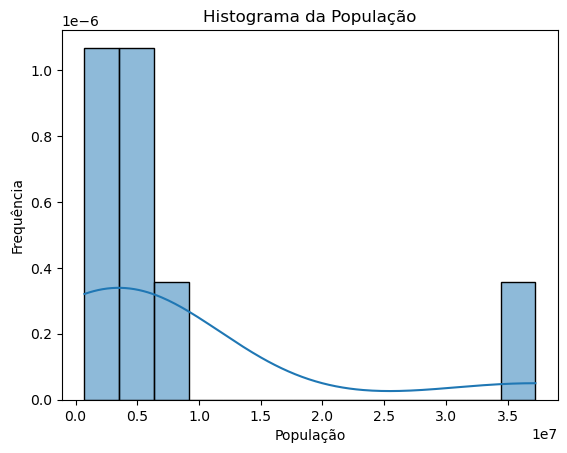

In [13]:
ax = sns.histplot(data = dados, x = 'População', stat = 'frequency', kde = True)
ax.set(title = 'Histograma da População', xlabel='População', ylabel='Frequência')

O histograma basicamente serve para observarmos a distribuição dos dados, esta primeira análise é um excelente guia de como devemos tratar os dados e enxergar determinados fatores do conjunto de dados apresentados.

Através deste histograma podemos observar que há uma certa concentração dos valores da população em torno de 5 milhões de habitantes. É possível também observar um *Outlier* próximo de 35 milhões de habitantes (Califórnia).

Possuímos um Dataset pequeno neste caso, contudo, ele exemplifica uma possível distribuição. No geral, devemos nos atentar à nossa amostra, uma vez que os histogramas somente serão úteis quando possuirmos no mínimo 20 medidas diferentes para se realizar alguma inferência inicial, ao se utilizar histogramas.

Localização é denominada como primeiro momento estatístico, enquanto a variabilidade é tratada como segundo momento estatístico. Ao mesmo passo os terceiro e quarto momentos são denominados de ***assimetria*** e ***curtose***. A ***assimetria*** indica se os dados estão inclinados a valores maiores ou menores, enquanto a ***curstose*** está associada à propensão dos dados possuírem valores extremos.

### Explorando Dados Binários e Categóricos

A principal forma de se realizar estudos acerca de Dados Binários ou Categóricos é realizar a sua contagem. Desta forma podemos fazer o tratamento com algumas métricas estatísticas e ter alguns insights acerca dos dados que acercam uma determinada população.

<br>

***Termos Chave***

<br>

**Moda**

O valor que mais se repete em um determinado conujunto de dados, pode ser um valor numérico ou textual.

***Valor esperado***

Quando as categorias podem ser associadas a um valor numérico, isso nos dá um valor médio com base na probabilidade de ocorrência de uma categoria

***Gráficos de barras***

A freuquência ou proporção de cada categoria representada por barras.

***Gráficos de pizza***

A frequência ou proporção de cada categoria representada por fatias de uma pizza.

<br>

Contudo, os Gráficos de Pizza são evitados pelos estatísticos, pois são visualmente menos informativos.

### Correlação

Geralmente, na análise de dados utilizamos o estudo da correlação entre preditores, ou mesmo entre preditores e uma variável-alvo. Dizemos que a correlação entre duas variáveis X e Y é positiva quando so valores altos de X acompanham os valores altos de Y, isto também ocorre quando os valores baixos de X acompanham os valores baixos de Y. Ao mesmo passo, dizemos que duas variáveis são negativamente correlacionadas quando os valores altos de X acompanham os valores baixos de Y e vice-versa.


**Coeficiente de correlação**

Uma métrica que mede o nível em que as variáveis numéricas estão associadas umas às outras (varia de -1 a +1)

**Matriz de correlação**

Uma tabela na qual as variáveis são mostradas tanto nas linhas quanto nas colunas, e os valores das células são a correlação entre as variáveis.

**Diagrama de Dispersão**

Um gráfico no qual o eixo x é o valor de uma variável, e o eixo y é o valor de outra.

**Coeficiente de correlação de Pearson**

$ r = \frac{\sum^N_{i = 1}(x_i-\overline{x})(y_i-\overline{y})}{(N-1)S_xS_y}  $

O coeficiente de correlação sempre deve ficar entre +1, que indica correlação positiva perfeita, e -1, que indica correlação negativa perfeita.  Quando obtém-se 0 do coeficiente de correlação, significa que não há correlação entre as variáveis avaliadas.

Muitas vezes a variáveis têm uma associação não linear, nestes casos o coeficiente de correlação pode não ser uma métrica útil.

In [14]:
# Importação de dados limpos de um projeto que estou desenvolvendo
dados = pd.read_csv('https://raw.githubusercontent.com/askot19/Projetos/main/Telefonia/Dados/aluravoz_clean.csv')
# Correção da importação do índice
dados.drop(columns = 'Unnamed: 0', inplace = True)

In [15]:
# Criação de tabela de correlação das variáveis do Dataset
dados.corr()

C:\Users\Supervisor\AppData\Local\Temp\ipykernel_62672\2151773638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Senior,Posse,CobrancasMensais,CobrancasTotais
Senior,1.000000,0.016567,0.220173,0.102997
Posse,0.016567,1.000000,0.247900,0.826164
CobrancasMensais,0.220173,0.247900,1.000000,0.651182
CobrancasTotais,0.102997,0.826164,0.651182,1.000000


C:\Users\Supervisor\AppData\Local\Temp\ipykernel_62672\2355851679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


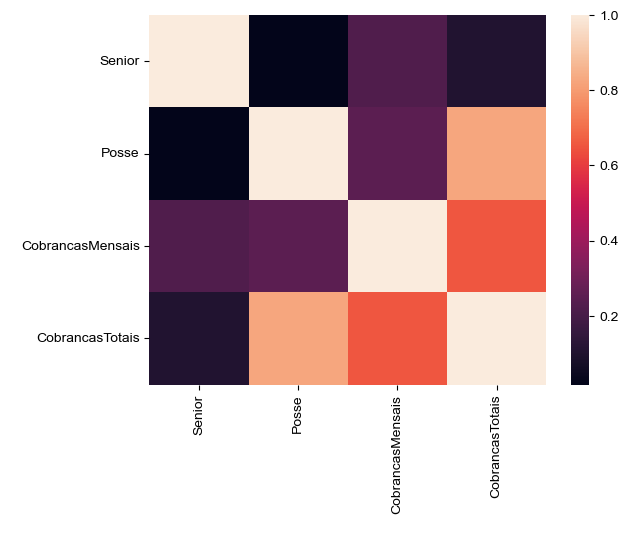

In [16]:
# Criação de um heatmap para ilustrar a correlação das variáveis
sns.heatmap(dados.corr())
sns.set(rc = {'figure.figsize':(4, 4)})

Podemos observar que através dessa métrica é possível identificar que o tempo de posse de contrato está fortemente correlacionado às cobranças tanto totais quanto mensais. O mesmo ocorre entre as cobranças em si. Contudo, as demais variáveis apresentam pouca ou até mesmo nenhuma correlação entre si.

O coeficiente de correlação também é sensível aos outliers nos dados. 

### Gráficos de Dispersão

Gráficos de dispersão servem para compreender o comportamento e relação entre duas variáveis de dados mensuradas. O eixo x representa uma variável, o eixo y, outra, e cada ponto no gráfico é um registro. Podemos observar forte relação positiva entre as **cobranças mensais** e as **cobranças totais** dos dados anteriores. Isso é um fator óbvio, uma vez que as cobranças totais são uma somatória das cobranças mensais, contudo, é importante ressaltar esse comportamento, pois nem sempre a percepção dessa correlação é trivial, sendo assim, a construção do gráfico auxilia a nesse trajeto. Nesse caso, um aumento nas cobranças mensais sempre vai gerar um aumento nas cobranças totais.

<Axes: xlabel='CobrancasMensais', ylabel='CobrancasTotais'>

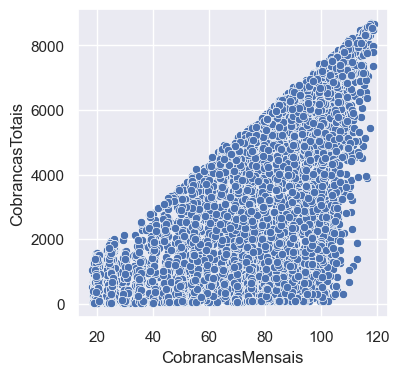

In [18]:
sns.scatterplot(data = dados, x = 'CobrancasMensais', y = 'CobrancasTotais')

---
### Explorando Duas ou Mais Variáveis

A média e variância, examinam uma variável por vez (análise univariada). A análise de correlação é um método importante que compara duas variáveis (análise bivariada). Nesta seção veremos estimativas e gráficos adicionais e com mais de duas variáveis (análise multivariada).


#### Termos-chave para Exploração de Duas ou Mais Variáveis

**Tabelas de contingência**

Um registro das contagens entre duas ou mais variáveis categóricas.

**Compartimentação hexagonal**
O gráfico de duas variáveis métricas com os registros compartimentados em hexágonos

**Gráficos de contorno**

Um gráfico mostrando a densidade de duas variáveis numéricas como um mapa topográfico.

**Gráficos violino**

Semelhante a um boxplot, mas mostrando a estimativa de densidade.

Como a análise univariada, análise bivariada envolve tanto o cálculo de estatísticas resumidas quanto a produção de representações visuais. O tipo adequado de análise bivariada ou multivariada depende da natureza dos dados: numéricos versus categóricos.

### Compartimentação Hexagonal e Contornos (Representando Numéricos versus Dados Numéricos)

Gráficos de dispersão são bons quando há um número relativamente pequeno de valores de dados. Para conjuntos de dados com centenas de milhares, ou milhões, de registros, um gráfico de dispersão seria muito denso (como o visto na seção anterior, ele não é o mais adequado), então precisamos de um modo diferente de visualizar a relação. Para ilustrar, vamos ainda considerar os dados apresentados do dataset do meu projeto de Telefonia. Poderiamos centralizar mais os dados, excluindo valores muito baratos e muito caros, contudo, este dataset está concentrado principalmente em uma das extremidades, que é o de valores mais baixos, devido a uma alta evasão no primeiro mês de uso dos serviços dos clientes, desta forma, teríamos uma exclusão de dados muito importantes para insights relacionados a essas informações. Podemos observar isso nos campos em preto no gráfico, e uma distribuição quase linear dos demais valores ao longo da compartimentação hexagonal, associados aos gráfficos de barras em cada eixo, representando a distribuição da respectiva variável.



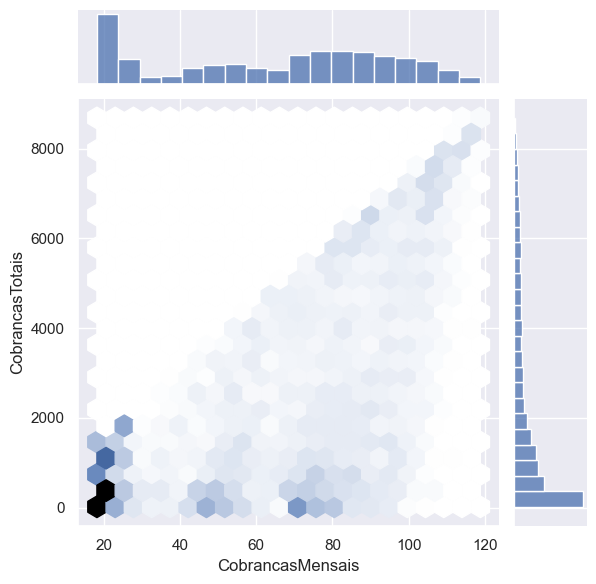

In [19]:
sns.jointplot(data = dados, x = 'CobrancasMensais', y = 'CobrancasTotais', kind = 'hex')

Já o próximo gráfico utiliza o conceito de mapas topográficos para se criar uma ideia da densidade dos valores. Linhas muito próximas criam maiores densidades de valores associadas às duas variáveis. 

<Axes: xlabel='CobrancasMensais', ylabel='CobrancasTotais'>

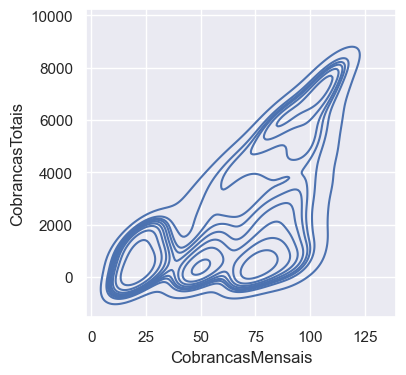

In [21]:
sns.kdeplot(data = dados, x = 'CobrancasMensais', y = 'CobrancasTotais')

Outros tipos de gráficos são usados para mostrar o relacionamento entre duas variáveis numéricas, incluindo *mapas de calor*. Mapas de calor, compartimentação hexagonal e gráficos de contorno oferecem uma representação visual de uma densidade bidimensional. Assim, são naturalmente análogos a histogramas e gráficos de densidade.

### Duas Variáveis Categóricas

Uma forma útil de resumir duas variáveis categóricas é a tabela de contingências - uma tabela de contingências por categoria. As tabelas de contingências conseguem observar apenas para as contagens, ou incluir também porcentagens de coluna e total. Um exemplo de tabela de contingência é a abaixo apresentada:

<img src="https://qph.cf2.quoracdn.net/main-qimg-7bae3aa184bcc6d1d062f7c7e916613b">

### Dados Categóricos e Numéricos

Boxplots são um jeito simples de comparar visualmente as distribuições de uma variável numérica agrupada conforme uma variável categórica. Por exemplo, podemos querer comparar como a porcentagem de atrasos de voos varia entre as companhias aéreas.

Um gráfico violino é uma melhoria no boxplot e registra a estimativa de densidade com a densidade no eixo y. A densidade é espelhada e invertida, então o formato resultante é preenchido, criando uma imagem que lembra um violino. A vantagem do gráfico violino é que ele pode mostrar nuances na distribuição que não seriam perceptíveis em um boxplot. Por outro lado, o boxplot mostra mais claramente os outliers dos dados.

<Axes: xlabel='Senior', ylabel='Posse'>

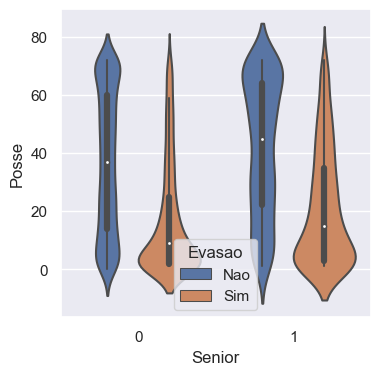

In [23]:
sns.violinplot(data = dados, x = 'Senior', y = 'Posse', hue = 'Evasao')

É possível observar que as concentrações de Evasão relacionadas à senioridade estão fortemente atreladas menores tempos de posse (em meses) do serviço. Temos uma correlação negativa entre as variáveis, ou seja, uma relação inversa entre as variáveis: quanto maior o tempo de serviço, encontramos menores taxas de evasão. Podemos ver como os violinos da evasão são muito mais concentrados no tempo de posse próximos de zero, então devem ser feitas medidas para a atração de clientes principalmente nos primerios meses de adesão, para se evitar o cancelamento de planos e serviços.

### Visualizando Variáveis Múltiplas

Os tipos de gráficos usados para comparar duas variáveis - gráficos de dispersão, compartimentação hexagonal e boxplots - são facilmente extensíveis para mais variáveis através da noção de *condicionamento*. Para isso, podemos criar múltiplos gráficos associando duas varíaveis, porém cada gráfico para uma terceira variável específica. Por exemplo, considerarmos os valores de impostos por metro quadrado construído, podemos construir um gráfico para cada região ou até mesmo código postal e assim observar onde são as regiões que concentram os maiores valores de impostos.

---

# Fim do Primeiro Capítulo
